In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Examining ChiX

## Imports

In [54]:
import ViennaRNA
from varnaapi import Structure
import os
from synbio_morpher.utils.data.data_format_tools.manipulate_fasta import load_seq_from_FASTA

import numpy as np
import pandas as pd

In [55]:
fn = os.path.join('..', 'data', 'sRNA', 'merged_inter.csv')
fn_merged = os.path.join('..', 'data', 'sRNA', 'merged_EcoCyc_RNAInter_sRNATarBase.csv')
data = pd.read_csv(fn)
data_merged = pd.read_csv(fn_merged)

try:
    data = data.drop(columns='Unnamed: 0')
    data_merged = data_merged.drop(columns='Unnamed: 0')
except:
    pass

In [56]:
chix = data[(data['Interactor 1'] == 'chiX') | (data['Interactor 2'] == 'chiX')]

['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCCTCTTTGACGGGCCAATAGCGATATTGGCCATTTTTTT', '-structureDBN', '...((((((((...)))))))).........(((((((((.....((........))(((((((....))))))))))))))))', '-o', '/tmp/tmpn890wt7a.png', '-resolution', '3']


Output file: /tmp/tmpn890wt7a.png



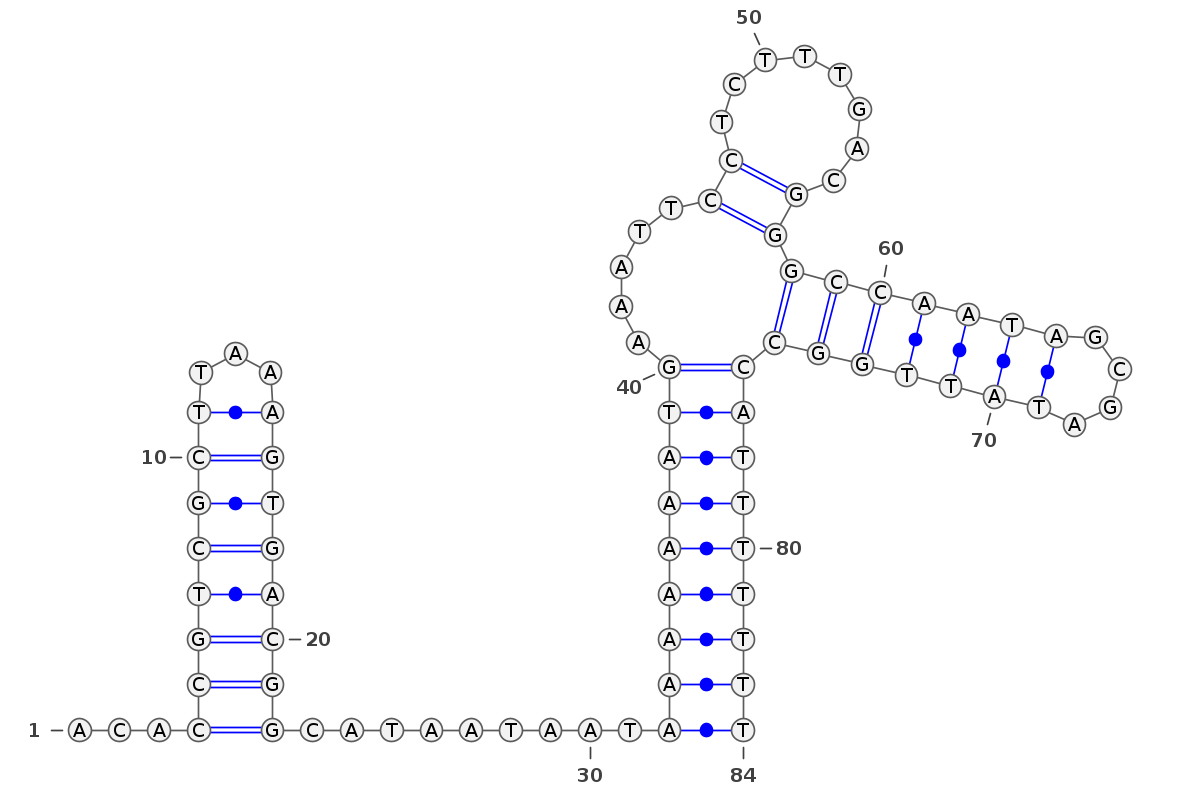

In [57]:
s = ''
# ChiX
seq = chix['Sequence 1'].iloc[0] if chix['Interactor 1'].iloc[0] == 'chiX' else chix['Sequence 2'].iloc[0]
folded = ViennaRNA.fold(seq, s)
folded

v = Structure(structure=folded[0], sequence=seq)
v._params['resolution'] = 3
v.show()
# v.savefig("example.png", show=True)

# Scott's mutations

In [58]:
fn_mutations = os.path.join('data', 'scott_mutations.fasta')

muts = load_seq_from_FASTA(fn_mutations, as_type='dict')


In [59]:
print('Synthetic sequence \t', muts['Syn_ChiX_20-D'])
print('Normal sequence \t', chix['Sequence 1'].iloc[0] if chix['Interactor 1'].iloc[0] == 'chiX' else chix['Sequence 2'].iloc[0])

Synthetic sequence 	 ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCTTCTCCTTTACGCATATGGCCAATAGCGATATTGGCCATTTTTTT
Normal sequence 	 ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCCTCTTTGACGGGCCAATAGCGATATTGGCCATTTTTTT


['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTCTTCTCCTTTACGCATATGGCCAATAGCGATATTGGCCATTTTTTT', '-structureDBN', '...((((((((...)))))))).......................................((((((((((....))))))))))......', '-o', '/tmp/tmprp94rm8n.png', '-resolution', '3']


Output file: /tmp/tmprp94rm8n.png



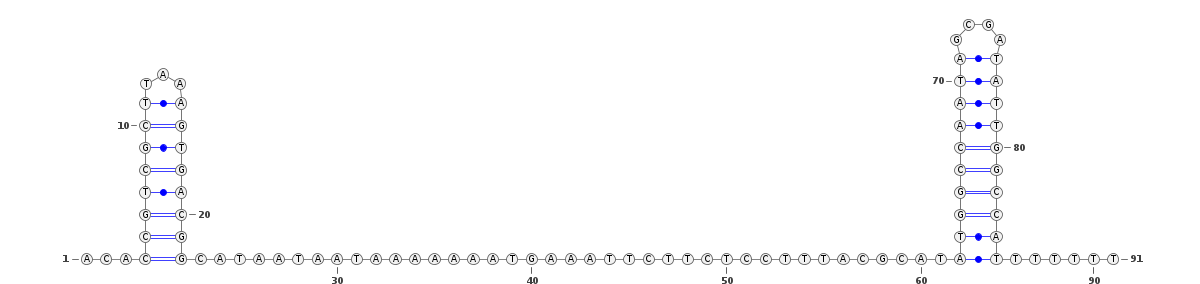

In [60]:
s = ''
# Synthetic ChiX
seq = muts['Syn_ChiX_20-D']
folded = ViennaRNA.fold(seq, s)
folded

v = Structure(structure=folded[0], sequence=seq)
v._params['resolution'] = 3
v.show()
# v.savefig("example.png", show=True)

In [61]:
chix

,Interactor 1,Interactor 2,ID 1,ID 2,Category 1,Category 2,Regulation,Binding position 1,Binding position 2,Sequence 1,Sequence 2,Source DB
279,chiX,rpoS,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:947210",NaN,mRNA,No Interaction,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTCAGAATACGCTGAAAGTTCATGATTTAAATGAAGATGCGG...,sRNATarBase
353,chiX,citA,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945233",trans-encoded antisense RNA,mRNA,Repression,['46..57'],['-37..-26'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGTTGCAGCTTAACGAGAATAAACAGTTTGCATTTTTCCAAAGAC...,sRNATarBase
374,chiX,chiP,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945296",trans-encoded antisense RNA,mRNA,Repression,['81..92'],['45..56'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGCGTACGTTTAGTGGCAAACGTAGTACGCTGGCGCTGGCTATCG...,sRNATarBase
408,chiX,chbC,"chromosome:NC_000913.3, Gene ID:5061500","chromosome:NC_000913.3, Gene ID:945982",trans-encoded antisense RNA,mRNA,Repression,['NA'],['NA'],ACACCGTCGCTTAAAGTGACGGCATAATAATAAAAAAATGAAATTC...,ATGAGTAATGTTATTGCATCGCTTGAAAAGGTACTCCTCCCTTTTG...,sRNATarBase


# Analyse synthetic chiX binding to all targets

In [ ]:
ViennaRNA.fold()

